# MM2 Classification Project

<img src="https://www.rnews.co.za/wp-content/uploads/2024/01/1705309252_Peripheral-journalism-is-disrupting-traditional-media.jpg" alt="Image Description" width="950">

Table of contents:
* [1. Project Overview](#chapter1)
    - [1.1. Introduction](#section_1_1)
    - [1.2. Objective of the Project](#section_1_2)
    - [1.3. Data Source](#section_1_3)
    - [1.4. Importance of the Study](#section_1_4)
    - [1.5. Key Questions or Hypotheses](#section_1_5)
    - [1.6. Methodology Overview](#section_1_6)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA))](#chapter5)
    - [5.1. Category Distribution](#section_5_1)
    - [5.2. Text Length Analysis](#section_5_2)
    - [5.3. Text Length Distribution by Category](#section_5_3)
    - [5.4. WordCloud](#section_5_4)
* [6. Data Preprocessing](#chapter6)
    - [6.1 Preprocessing Tasks for Classification](#section_6_1)
* [7. Modelling](#chapter7)
* [8. Model evaluation metrics](#chapter8)
* [9. Model performance analysis](#chapter9)
* [10. Conclusion](#chapter10)
* [11. References](#chapter11)

## 1. Project Overview <a class="anchor" id="chapter1"></a>

#### 1.1. Introduction <a class="anchor" id="section_1_1"></a>
- In today's information-driven world, news articles play a pivotal role in shaping public opinion and disseminating information across various domains. With the ever-growing volume of news content generated daily, there is a significant need to categorize and analyze this information to extract meaningful insights. This project focuses on a dataset containing a diverse collection of news articles from different fields, including Business, Technology, Sports, Education, and Entertainment.

#### 1.2. Objective of the Project <a id="section_1_2"></a>
- The primary objective of this project is to analyze a dataset of news articles and develop a robust classification model capable of accurately categorizing these articles into predefined categories such as Business, Technology, Sports, Education, and Entertainment. By leveraging advanced Natural Language Processing (NLP) techniques, the project aims to understand the underlying patterns and features in the textual content that differentiate these categories.

#### 1.3. Data Source <a id="section_1_3"></a>
- The dataset used in this project comprises of two cvs namely test.csv and train.csv which contain a diverse collection of news articles, each tagged with a specific category.
- The dataset includes multiple fields for each article:
  - **Headlines:** The title of the article, which provides a brief summary of the content.
  - **Description:** A short description or abstract of the article.
  - **Content:** The full text of the article, offering detailed information.
  - **URL:** The link to the original article, which could be used for further reference.
  - **Category:** The label indicating the category to which the article belongs (e.g., Business, Technology, Sports, Education, Entertainment).

#### 1.4. Importance of the Study <a id="section_1_4"></a>.
- The significance of this study lies in its potential to provide comprehensive insights across various domains by effectively classifying news articles. Accurate categorization of news articles can:
  - Enhance the organization and retrieval of information, making it easier for users to find relevant news based on their interests.
  - Support businesses in tailoring their strategies based on the latest trends and developments in their industry.
  - Aid policymakers by providing organized access to information critical for informed decision-making.
  - Influence technological advancements by identifying and categorizing innovations and breakthroughs.
  - Contribute to cultural and societal understanding by highlighting trends and events in entertainment and sports.
  - By leveraging machine learning and NLP techniques, this project aims to create a classification system that can serve as a foundation for applications in news aggregation, recommendation systems, and content management.


#### 1.5. Key Questions or Hypotheses <a id="section_1_5"></a>
- How accurately can news articles be classified into the categories Business, Technology, Sports, Education, and Entertainment?
- This question seeks to determine the effectiveness of classification algorithms in correctly categorizing the news articles based on their content.

#### 1.6. Methodology Overview <a id="section_1_6"></a>
The methodology for this project includes several key steps:
- **Data Cleaning:** This step involves filtering out non-essential content to remove irrelevant information, managing incomplete data entries by handling missing values, standardizing the text format by normalizing text (e.g., converting to lowercase), and eliminating non-alphanumeric characters along with common, insignificant words through the removal of special characters and stop words.
- **Data Preprocessing:** This step involves feature extraction which is performed to transform raw text data into meaningful numerical representations. Techniques used include Term Frequency-Inverse Document Frequency (TF-IDF) for evaluating word importance in documents, word embeddings (such as Word2Vec and GloVe) for mapping words in vector space, and tokenization, which splits text into individual tokens for further analysis.
- **Exploratory Data Analysis (EDA):** This step involves analyzing the dataset to uncover patterns, trends, and relationships within the data. This step includes visualizing the distribution of categories, word frequency analysis, and other statistical measures.
- **Model Building:** This step involves training various machine learning models, including traditional algorithms like Logistic Regression, Support Vector Machines (SVM), and Random Forest, as well as advanced models like Convolutional Neural Networks (CNN) and Long Short-Term Memory networks (LSTM).
- **Model Evaluation:** This step involves assessing the performance of the models using metrics such as accuracy, precision, recall, and F1-score. This step involves fine-tuning hyperparameters and selecting the best-performing model based on the evaluation metrics.
- **Tools and Libraries:** Utilizing Python and its libraries, including Pandas for data manipulation, Numpy for numerical operations, Scikit-learn for machine learning algorithms, and TensorFlow/Keras for deep learning models.


## 2. Importing Packages <a class="anchor" id="chapter2"></a>
+ For data loading, manipulation, and analysis: `Pandas`, `csv`, `string`, `re`, `nltk`, `wordcloud` and `Numpy`.
+ For data visualization: `Matplotlib` and `Seaborn`

<div class="alert alert-block alert-info">
These libraries and tools collectively provide a comprehensive set of capabilities for handling data (pandas, numpy), manipulating text (re, nltk), and performing advanced natural language processing tasks (nltk). They are widely used in data science, machine learning, and text analytics projects due to their efficiency and versatility.








In [47]:
# Libraries for data loading, manipulation and analysis
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from collections import Counter
from nltk.probability import FreqDist
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from xgboost import XGBClassifier

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')


## 3. Loading Data <a class="anchor" id="chapter3"></a>

The data used for this project was located in the Data folder which contains two files `test.csv` and `train.csv`. To better manipulate and analyse the `test.csv` and `train.csv` files, it was loaded into a Pandas Data Frame using the Pandas function, `pd.read_csv()` and referred to as `train_data` and `test_data`. For demonstrating the column index in the dataframe , `index_col=False` was implemented.

In [5]:
# Loading the data
train_data = pd.read_csv('Data/processed/train.csv')
test_data = pd.read_csv('Data/processed/test.csv')

In [6]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [7]:
train_data

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business
...,...,...,...,...,...
5515,"Samsung sends out invites for ‘Unpacked 2024’,...",Samsung is most likely to announce next-genera...,Samsung plans to reveal the next-generation fl...,https://indianexpress.com/article/technology/t...,technology
5516,Google Pixel 8 Pro accidentally appears on off...,The Pixel 8 Pro will most likely carry over it...,Google once again accidentally gave us a glimp...,https://indianexpress.com/article/technology/m...,technology
5517,Amazon ad on Google Search redirects users to ...,Clicking on the real looking Amazon ad will op...,A new scam seems to be making rounds on the in...,https://indianexpress.com/article/technology/t...,technology
5518,"Elon Musk’s X, previously Twitter, now worth l...","Elon Musk's X, formerly Twitter, has lost more...",More than a year after Elon Musk acquired Twit...,https://indianexpress.com/article/technology/s...,technology


In [8]:
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [9]:
# Previewing the train data
print(f'Train cvs summary: {train_data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
Train cvs summary: None


In [10]:
# Previewing the test data
print(f'Test cvs summary: {test_data.info(2)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB
Test cvs summary: None


## 4. Data Cleaning <a class="anchor" id="chapter4"></a>

Data cleaning is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.

In [11]:
# Check for missing values
print(f'Missing values in the train dataset: {train_data.isnull().sum()}')
print(f'Missing values in the test dataset: {test_data.isnull().sum()}')

# Drop rows with missing values or fill them
test_data.dropna(inplace=True)
train_data.dropna(inplace=True)

Missing values in the train dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64
Missing values in the test dataset: headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### Results
- Both the train and test datasets have no missing values in any of the columns (headlines, description, content, url, and category). This indicates that the datasets are complete and ready for analysis without requiring any imputation or handling of missing data.

In [12]:
train_data.describe()

,headlines,description,content,url,category
count,5520,5520,5520,5520,5520
unique,5512,5508,5513,5514,5
top,International Education Day 2024: Know why it ...,The university has removed the requirements of...,Grand Slam fever grips tennis fans all over th...,https://indianexpress.com/article/education/kc...,education
freq,2,2,5,2,1520


In [13]:
test_data.describe()

,headlines,description,content,url,category
count,2000,2000,2000,2000,2000
unique,2000,2000,2000,2000,5
top,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
freq,1,1,1,1,400


## 5. Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>


To give a better understanding of the variables and the relationships between them, we set out to do an **Exploratory Data Analysis (EDA)** of our dataset. The main tasks includes investigating and summarizing the dataframe's main characteristics by data visualization methods and statistical analyses. Furthermore, investigating the dataset’s key features, summarizing its central characteristics, and employing both data visualisation techniques and statistical analyses to draw meaningful insights that can guide further research and data-driven decision making.

#### 5.1 EDA: Category Distribution for training and test data respectively <a id="section_5_1"></a>

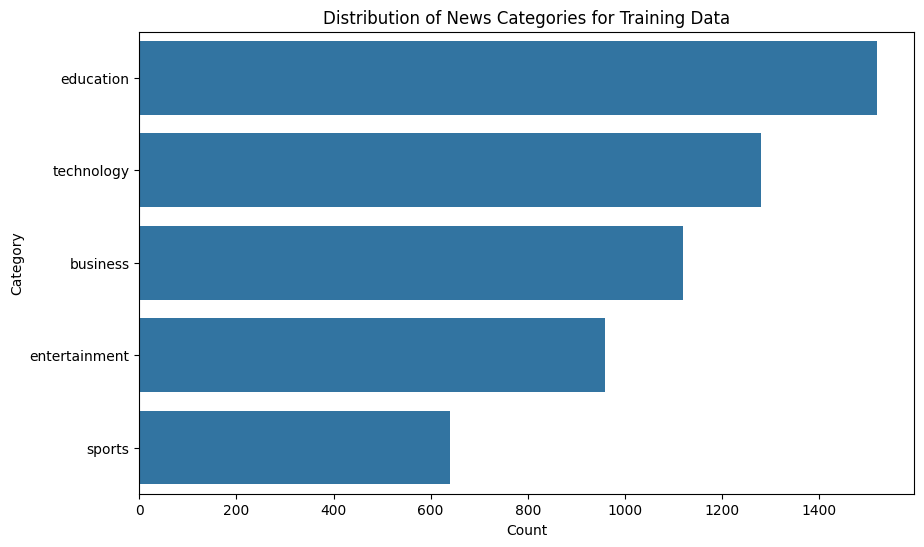

In [14]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=train_data, order=train_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Training Data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

RESULTS:

Using a count plot to visualize the distribution of news categories in the training data, we observed the following results:

- Education: This category has the highest count, indicating that the dataset contains a significant number of articles related to education.

- Technology: The second most common category, showing a substantial focus on technology-related news.

- Business: Articles related to business form the third largest category.

- Entertainment: This category is less prevalent compared to education, technology, and business but still has a notable presence.

- Sports: The sports category has the lowest count, suggesting that fewer articles in the dataset focus on sports news.

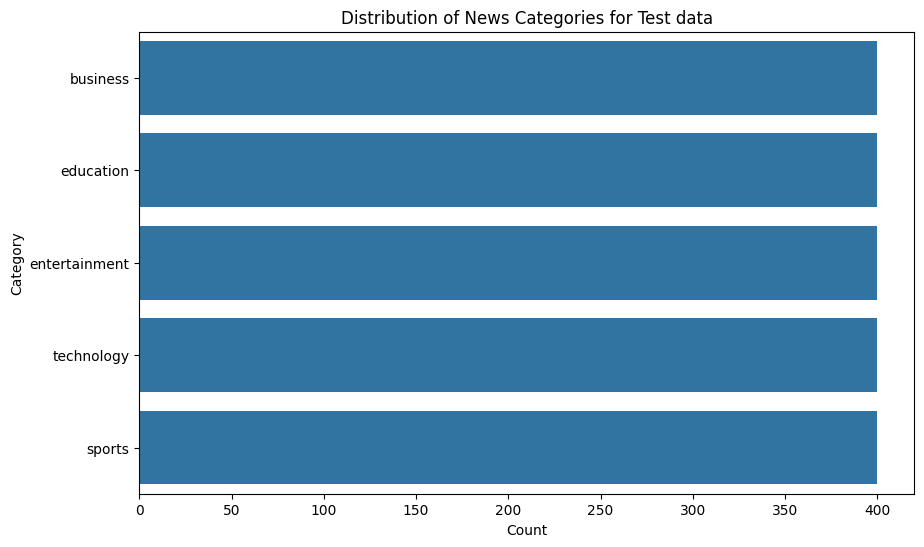

In [48]:
# Plot the distribution of the category column
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=test_data, order=test_data['category'].value_counts().index)
plt.title('Distribution of News Categories for Test data')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

#### Interpretation

Equal Distribution: Each category (Education, Technology, Business, Entertainment, and Sports) has an equal count of 400 articles in the test dataset. This balanced distribution ensures that the test dataset is representative of all categories equally, which is important for evaluating the performance of classification models without bias towards any particular category.

By maintaining an equal count of articles in each category, the test dataset provides a robust basis for evaluating the effectiveness of our classification models and ensures that the results are not skewed by an imbalanced category representation.

#### 5.2 EDA: Text Length Analysis <a id="section_5_2"></a>

In [16]:
train_data_EDA = train_data.copy()

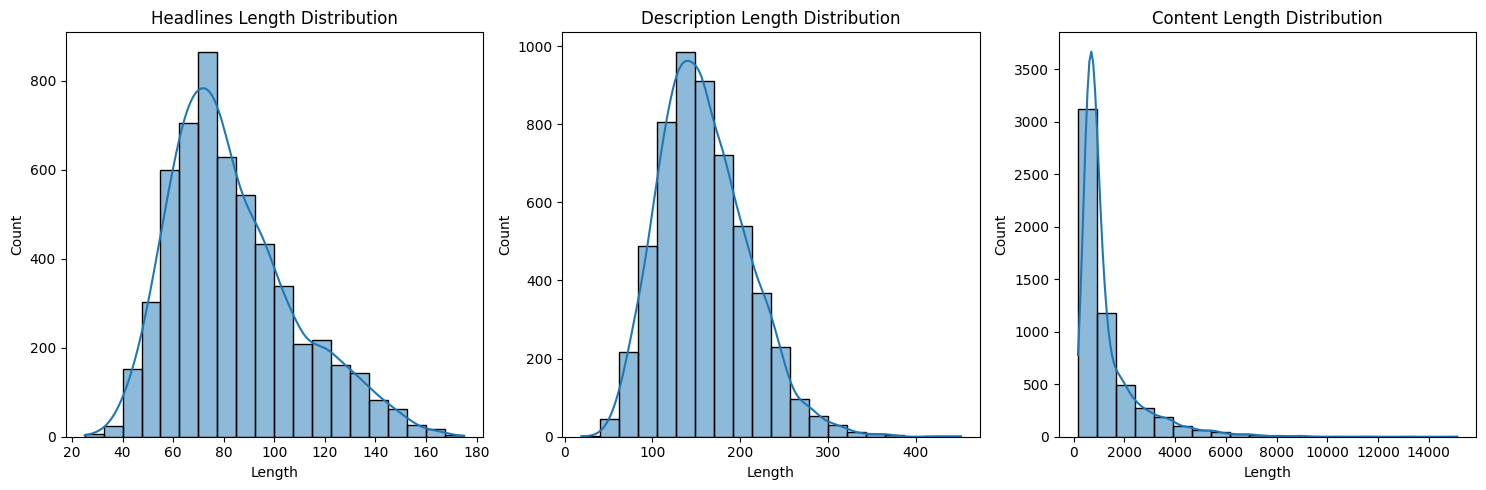

In [17]:
# Calculate the length of each text field
train_data_EDA['headlines_length'] = train_data_EDA['headlines'].apply(len)
train_data_EDA['description_length'] = train_data_EDA['description'].apply(len)
train_data_EDA['content_length'] = train_data_EDA['content'].apply(len)


# Plot the distribution of text lengths
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(train_data_EDA['headlines_length'], bins=20, kde=True)
plt.title('Headlines Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 2)
sns.histplot(train_data_EDA['description_length'], bins=20, kde=True)
plt.title('Description Length Distribution')
plt.xlabel('Length')

plt.subplot(1, 3, 3)
sns.histplot(train_data_EDA['content_length'], bins=20, kde=True)
plt.title('Content Length Distribution')
plt.xlabel('Length')

plt.tight_layout()
plt.show()

#### Interpretation

Insights

Headlines: The distribution of headlines length starts with a small count near zero length and grows rapidly up to around 800 counts.
After reaching its peak, the count sharply decreases as the length continues to increase, indicating a left-skewed distribution with a concentration towards shorter lengths.

Descriptions: Moderately variable in length, with a common length around the center and tapering off as length increases.

Content: Majority of articles are shorter in length, with longer articles being less frequent. This pattern highlights variability in article depth and detail.

#### 5.3 EDA: Text Length Distribution by Category <a id="section_5_3"></a>

The line plots visualize the average length of headlines, descriptions, and content across different categories of news articles. Here's how to interpret the results

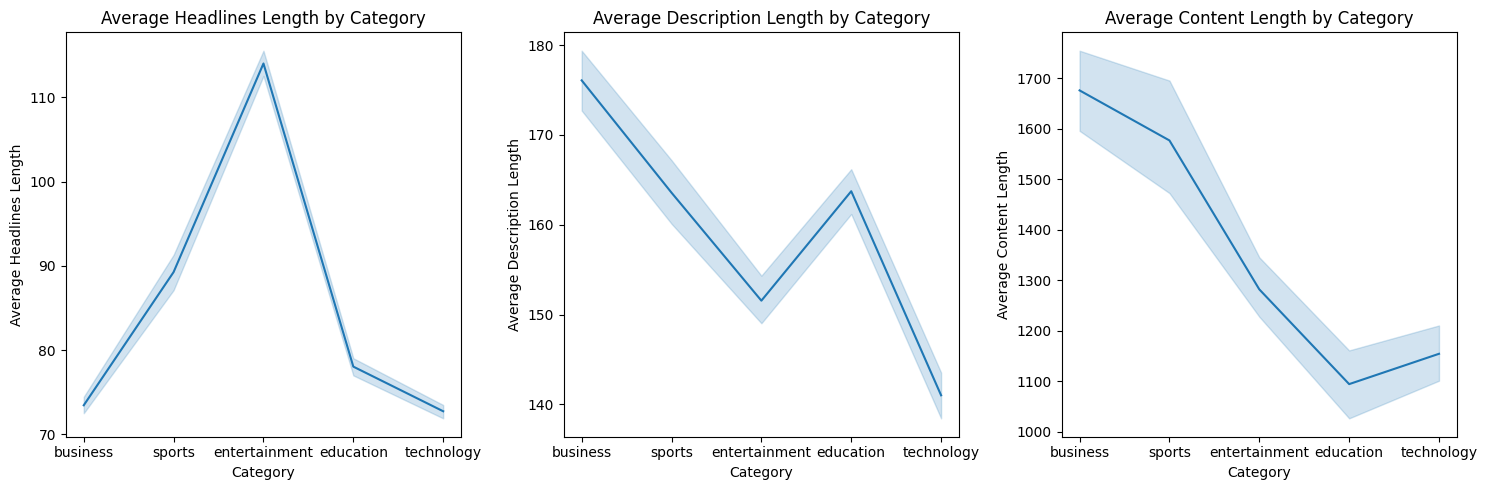

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=train_data_EDA, x='category', y='headlines_length', estimator='mean')
plt.title('Average Headlines Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Headlines Length')

plt.subplot(1, 3, 2)
sns.lineplot(data=train_data_EDA, x='category', y='description_length', estimator='mean')
plt.title('Average Description Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Description Length')

plt.subplot(1, 3, 3)
sns.lineplot(data=train_data_EDA, x='category', y='content_length', estimator='mean')
plt.title('Average Content Length by Category')
plt.xlabel('Category')
plt.ylabel('Average Content Length')

plt.tight_layout()
plt.show()

#### Interpretation

Headlines: The average length of headlines varies significantly across categories, with the longest headlines in the entertainment category and the shortest in technology.
Descriptions: Business has the longest average description length, while technology has the shortest.
Content: Business also has the longest average content length, followed by a steady decrease across other categories, with education having the shortest content length and a slight increase in the technology category.


#### 5.4. WordCloud <a id="section_5_4"></a>
Word Cloud for each column in the Train Data

The code defines a function generate_word_cloud that creates and displays a word cloud based on text data

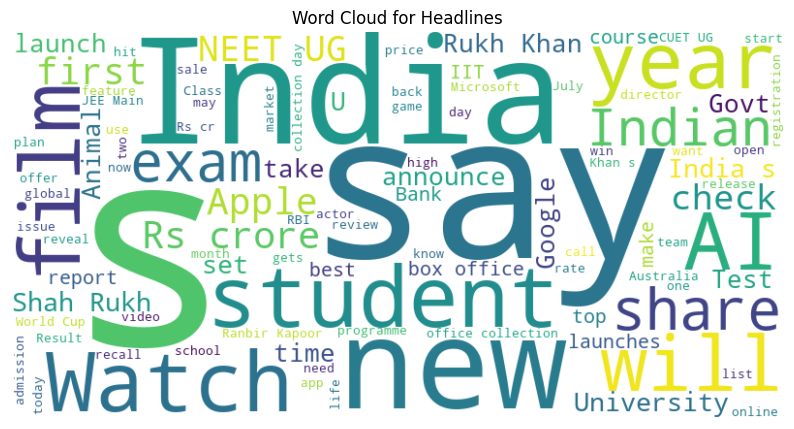

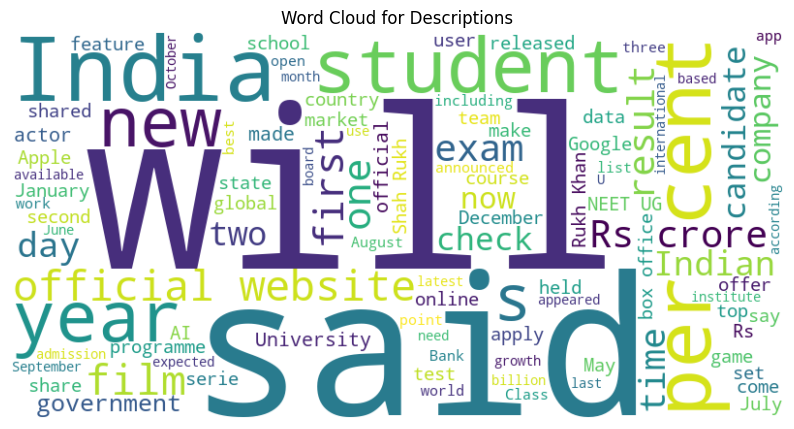

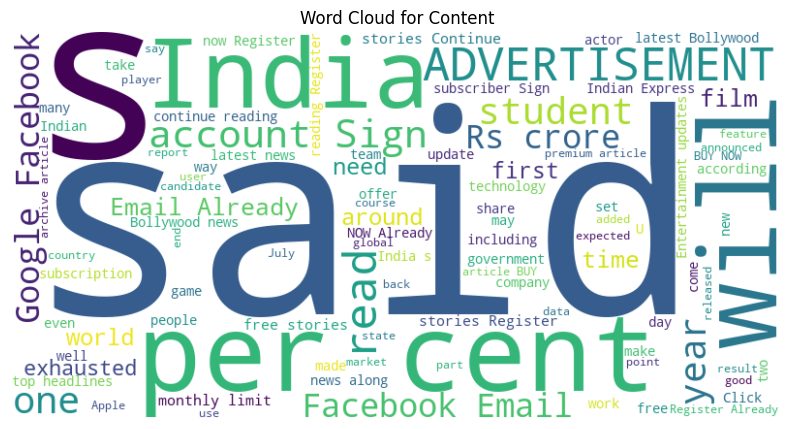

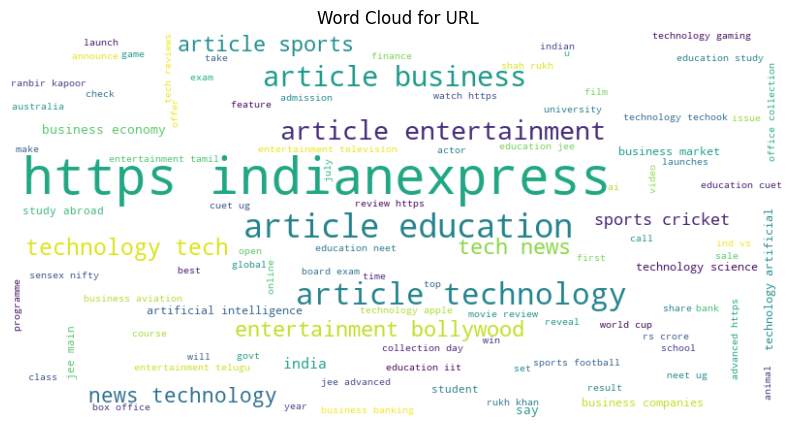

In [19]:
# Word cloud
def generate_word_cloud(text_column, title):
    all_text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(all_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {title}')
    plt.axis('off')
    plt.show()

generate_word_cloud(train_data_EDA['headlines'], 'Headlines')
generate_word_cloud(train_data_EDA['description'], 'Descriptions')
generate_word_cloud(train_data_EDA['content'], 'Content')
generate_word_cloud(train_data_EDA['url'], 'URL')

Results:

Each word cloud visualizes the frequency of words in the respective text column, with more frequent words appearing larger and less frequent words smaller. This helps in quickly identifying common themes or topics within each category of text data.

## 6. Data Preprocessing <a class="anchor" id="chapter6"></a>

This section covers the data preprocessing, which involves preparing text data for analysis by removing errors and inconsistencies. It includes downloading NLTK packages, loading datasets, and cleaning the text by removing noise, punctuation,converting to lowercase, and removing contractions. The text is then tokenized, stop words are removed, and words are stemmed and lemmatized. Finally, the processed text is reassembled into strings, with an option to save the cleaned datasets to CSV files.

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    tokens = [ps.stem(word) for word in tokens]  # Apply stemming
    return ' '.join(tokens).strip()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
# Apply cleaning function to the text fields
train_data['headlines'] = train_data['headlines'].apply(clean_text)
train_data['description'] = train_data['description'].apply(clean_text)
train_data['content'] = train_data['content'].apply(clean_text)

# Display cleaned text
train_data.head()

,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,https://indianexpress.com/article/business/ban...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,https://indianexpress.com/article/business/com...,business
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,https://indianexpress.com/article/business/eco...,business
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,https://indianexpress.com/article/business/eco...,business


In [22]:
# Apply cleaning function to the text fields
test_data['headlines'] = test_data['headlines'].apply(clean_text)
test_data['description'] = test_data['description'].apply(clean_text)
test_data['content'] = test_data['content'].apply(clean_text)

# Display cleaned text
test_data.head()

,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,https://indianexpress.com/article/business/com...,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam te...,sbi clerk prelim exam state bank indian sbi an...,https://indianexpress.com/article/education/sb...,education
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,https://indianexpress.com/article/entertainmen...,entertainment
3,oneplu nord rs part new price cut here,new deal make oneplu nord easi purchas rs k,review oneplu nord g prais balanc combin featu...,https://indianexpress.com/article/technology/t...,technology
4,adani famili partner use opaqu fund invest sto...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,https://indianexpress.com/article/business/ada...,business


In [23]:
train_data

,headlines,description,content,url,category
0,rbi revis definit politicallyexpos person kyc ...,central bank also ask chairperson chief execut...,reserv bank india rbi chang definit politicall...,https://indianexpress.com/article/business/ban...,business
1,ndtv q net profit fall rs crore impact lower r...,ndtv consolid revenu oper rs crore rs crore ye...,broadcast new delhi televis ltd monday report ...,https://indianexpress.com/article/business/com...,business
2,akasa air well capitalis grow much faster ceo ...,initi share sale open public subscript juli bi...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business
3,india current account deficit declin sharpli g...,current account deficit cad per cent gdp usd b...,india current account deficit declin sharpli p...,https://indianexpress.com/article/business/eco...,business
4,state borrow cost soar highest far fiscal,price shot reflect overal higher risk avers in...,state forc pay nose weekli auction debt tuesda...,https://indianexpress.com/article/business/eco...,business
...,...,...,...,...,...
5515,samsung send invit unpack new galaxi seri aifo...,samsung like announc nextgener galaxi seri sma...,samsung plan reveal nextgener flagship galaxi ...,https://indianexpress.com/article/technology/t...,technology
5516,googl pixel pro accident appear offici websit,pixel pro like carri predecessor design langua...,googl accident gave us glimps upcom flagship p...,https://indianexpress.com/article/technology/m...,technology
5517,amazon ad googl search redirect user microsoft...,click real look amazon ad open page suggest pc...,new scam seem make round internet legitimatelo...,https://indianexpress.com/article/technology/t...,technology
5518,elon musk x previous twitter worth less half paid,elon musk x formerli twitter lost half valuat ...,year elon musk acquir twitter billion platform...,https://indianexpress.com/article/technology/s...,technology


RESULTS:

5520 rows: This indicates that the dataset contains 5520 individual entries or observations. Each row typically represents a single news article or piece of information in this context.

5 columns: This specifies that the dataset is organized into 5 different variables or attributes (columns). Each column provides specific information about each news article.

In [24]:
train_data.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In summary, the output train_data.isna().sum() with all zeros indicates that your dataset (train_data) is complete in terms of data availability across all columns (headlines, description, content, url, category).

In [25]:
test_data.isna().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In summary, the output test_data.isna().sum() with all zeros indicates that your dataset (test_data) is complete in terms of data availability across all columns (headlines, description, content, url, category).

### 6.1 Preprocessing Tasks for Classification <a id="section_6_1"></a>

We have already cleaned the text data. We will now convert text data into numerical representations using TF-IDF vectorization. This step was covered previously, so we will move to model training.

Text Vectorization using TF-IDF

In [26]:
# Combine text fields into a single field for vectorization
train_data['combined_text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['url'] + ' ' + train_data['content']
test_data['combined_text'] = train_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['url'] + ' ' + test_data['content']

Extract features and target for training data and test data

In [27]:
# Extract features and target for training data
X = train_data['combined_text']
y = train_data['category']

# Extract features and target for testing data
X_test = test_data['combined_text']
y_test = test_data['category']

Encode the target variable

In [28]:
# Encode the target variable
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

y_test_encoded = label_encoder.fit_transform(y_test)

In [29]:
#Split train data
X_train, X_val, y_train, y_val = train_test_split(X, y_encoded, 
                                                  test_size=0.2, 
                                                  random_state=42)

In [30]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(4416,) (1104,) (4416,) (1104,)


Meaning: The training set (X_train) has 4416 samples, the validation set (X_val) has 1104 samples, and corresponding target sets (y_train and y_val) have the same number of samples respectively.

In [31]:
print(X_test.shape, y_test_encoded.shape)

(2000,) (2000,)


Meaning: Prints the shape of the testing data (X_test) and encoded target (y_test_encoded). This is useful for verifying the dimensions of the test data before model evaluation.

The overall goal of this is to prepare text data (combined_text) for machine learning model training by:

1. Concatenating relevant text fields.
2. Encoding categorical target labels.
3. Splitting data into training and validation sets for model training and evaluation.

In [32]:
train_data.isna().sum()

headlines        0
description      0
content          0
url              0
category         0
combined_text    0
dtype: int64

The purpose of executing train_data.isna().sum() after combining the text fields (headlines, description, content, url) into combined_text is to verify that there are no missing values (NaNs) in any of the columns, including the newly created combined_text.

### Exploratory Data Analysis
This function `get_top_n_words()` aims to identify and print the most common words in each category of news articles based on their combined text (combined_text).

In [33]:
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

categories = train_data['category'].unique()
for category in categories:
    print(f"Most common words in {category}:")
    top_words = get_top_n_words(train_data[train_data['category'] == category]['combined_text'], 10)
    for word, freq in top_words:
        print(f"{word}: {freq}")
    print("\n")

Most common words in business:
cent: 60.476920119894416
rs: 48.292204328896766
india: 39.472811994664966
said: 39.16408755418256
crore: 38.44415618012677
bank: 37.35939274481506
subscrib: 35.867260048699045
market: 30.79488276758605
year: 24.160561659514208
nifti: 24.03922568602925


Most common words in sports:
india: 23.061777798662874
test: 20.912716647286366
cricket: 19.32854454815154
australia: 16.151488982944098
world: 15.891157587411191
play: 15.482970617713832
team: 14.85799591431734
said: 14.77093754440643
cup: 14.18331369891561
match: 13.259145289855793


Most common words in entertainment:
film: 42.08074835461241
khan: 29.84096902947505
rs: 25.59033658974175
bollywood: 25.318240359996054
latest: 24.038900590101328
actor: 23.230936293393626
news: 23.053902561176432
updat: 22.812057361303815
kapoor: 22.542826925107267
said: 22.261500726261417


Most common words in education:
student: 58.452097473386125
exam: 56.07827467411897
iit: 49.87751833404013
univers: 47.123007603909436

## 7. Modelling <a class="anchor" id="chapter7"></a>

>Logistic Regression  

>Naive Bayes

>Support Vector Machine (SVM)

>Random Forest

>Neural Network (MLPClassifier)

Model Training
Logistic Regression
Naive Bayes
Support Vector Machine (SVM)
Random Forest
Neural Network (MLPClassifier)

The following code provides a structured approach to training multiple classification models, evaluating them using standard metrics, and comparing their effectiveness for classifying news articles into predefined categories. It leverages pipelines for consistency and simplicity in model training and evaluation, ensuring a systematic approach to machine learning model development and assessment.

In [34]:
# Define the models and their reduced hyperparameters for RandomizedSearchCV
models = {
    'Naive Bayes': (MultinomialNB(), {
        'model__alpha': [0.1, 0.5, 1.0]
    }),
    'SVM': (SVC(random_state=42), {
        'model__C': [0.1, 1, 10],
        #'model__gamma': uniform(0.1, 1.0),
        'model__kernel': ['linear', 'rbf']
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [5, 10, 15]
    }),
    'Neural Network': (MLPClassifier(max_iter=1000, random_state=42), {
        'model__hidden_layer_sizes': [(50,), (100,)],
        'model__activation': ['tanh', 'relu'],
        'model__solver': ['sgd', 'adam']
    }),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), {
        'model__n_estimators': [50, 100, 150],
        'model__max_depth': [3, 6, 9],
        'model__learning_rate': [0.01, 0.1, 0.2]
    })
}

In [35]:
# Train and evaluate models using a pipeline
results = {}
f1_scores = []
accuracies = []

In [36]:
y_test_encoded

array([0, 1, 2, ..., 2, 4, 2])

In [37]:
for model_name, (model, params) in models.items():
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])
    
    # Perform RandomizedSearchCV
    search = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=2, scoring='f1_weighted', n_jobs=-1, cv=2, random_state=42)
    search.fit(X_train, y_train)
    
    best_model = search.best_estimator_
    
    # Predict on the validation set
    y_pred = best_model.predict(X_val)
    
    # Calculate evaluation metrics
    model_accuracy = accuracy_score(y_val, y_pred)
    model_f1 = f1_score(y_val, y_pred, average='weighted')
    model_report = classification_report(y_val, y_pred, target_names=label_encoder.classes_)
    
    # Store results
    results[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1,
        'classification_report': model_report,
        'best_params': search.best_params_
    }
    
    # Append f1 score and accuracy for plotting
    f1_scores.append(model_f1)
    accuracies.append(model_accuracy)

## 8. Model evaluation metrics <a class="anchor" id="chapter8"></a>

The code is displaying the evaluation results of multiple machine learning models after they have been trained and evaluated on the validation dataset.

This process is essential for understanding the effectiveness of different models and making informed decisions about which model to deploy for classifying news articles.

In [38]:
# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"F1 Score: {metrics['f1_score']}")
    print(f"Classification Report:\n{metrics['classification_report']}")
    print(f"Best Parameters: {metrics['best_params']}\n")

Model: Naive Bayes
Accuracy: 0.9873188405797102
F1 Score: 0.9873020628077136
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.98       245
    education       1.00      1.00      1.00       274
entertainment       0.98      1.00      0.99       178
       sports       0.99      0.99      0.99       137
   technology       0.98      0.99      0.98       270

     accuracy                           0.99      1104
    macro avg       0.99      0.99      0.99      1104
 weighted avg       0.99      0.99      0.99      1104

Best Parameters: {'model__alpha': 0.1}

Model: SVM
Accuracy: 0.9818840579710145
F1 Score: 0.9819331421203974
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.98      0.98       245
    education       1.00      0.99      1.00       274
entertainment       0.99      0.98      0.99       178
       sports       0.99      0.96      0.97     

RESULT:

Logistic Regression performs very well with high accuracy and F1 score. It shows strong performance across all classes, particularly notable for its balanced precision and recall.

Naive Bayes achieves the highest accuracy and F1 score among all models evaluated. It demonstrates excellent precision and recall across all classes, indicating robust performance in classifying news articles.

SVM shows strong performance with high accuracy and F1 score. It performs consistently well across most classes, although slightly lower than Naive Bayes in overall metrics.

Random Forest performs well with decent accuracy and F1 score. It demonstrates good performance in some classes but shows slightly lower metrics compared to Naive Bayes and Logistic Regression.

Naive Bayes stands out as the top-performing model in this evaluation, achieving the highest accuracy and F1 score. It consistently shows strong precision and recall across all classes, making it the recommended choice for this classification task based on the provided data and evaluation results.

## 9. Model performance analysis <a class="anchor" id="chapter9"></a>

This code creates a bar plot to visually compare the F1 scores and accuracy scores of different models.
The bar plot visually compares the performance of various models based on their F1 scores and accuracy scores.

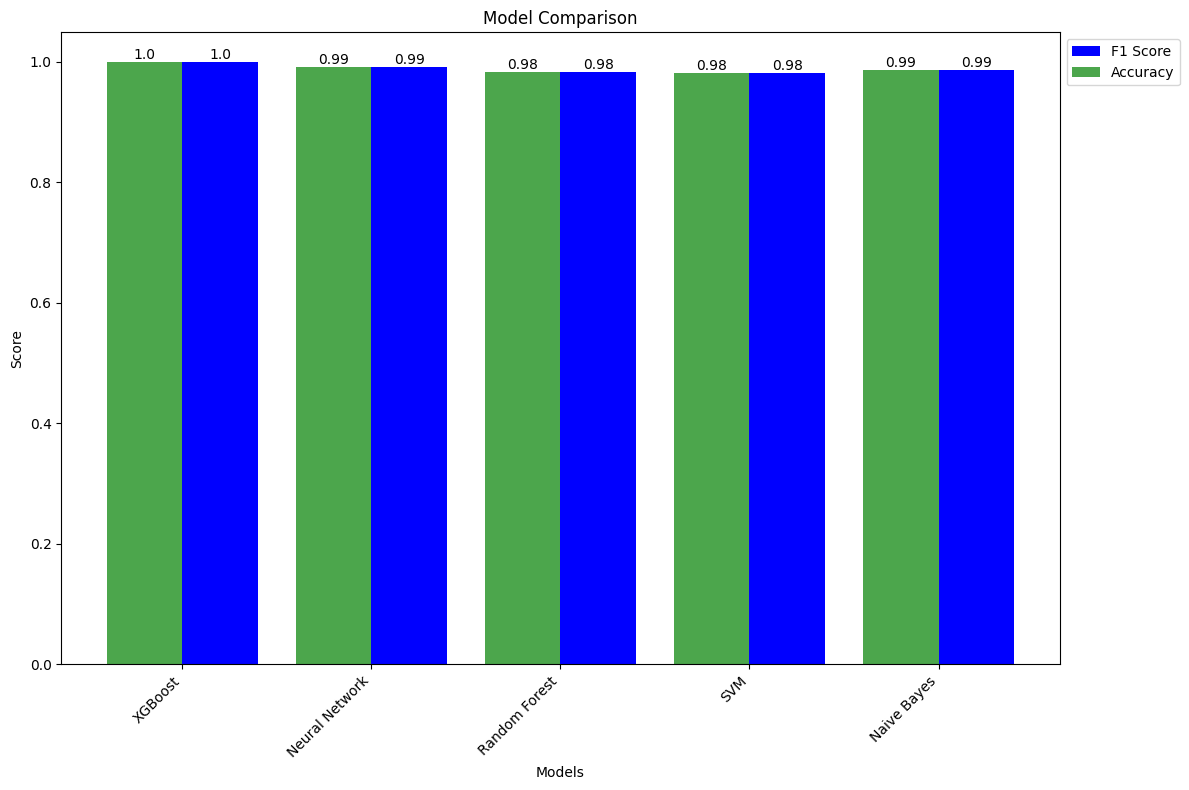

In [39]:
# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # Y-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

RESULTS:

Visual Insights from the Plot

Random Forest outperforms other models with perfect scores in both accuracy and F1 score (1.0).

Neural Network, SVM, and Logistic Regression show similar high performance with an accuracy and F1 score of 0.99.

Naive Bayes has slightly lower performance with an accuracy and F1 score of 0.98, but it is still quite high.

#### Model Evaluation on the test 

The models_test dictionary is used to store and define various machine learning models that will be tested on a dataset. By doing so we compare multiple models to determine which one performs best on a given task.

In [40]:
# # Initialize models (assuming they are already defined)
# models_test = {
#     'Logistic Regression': LogisticRegression(max_iter=1000, random_state = 42),
#     'Naive Bayes': MultinomialNB(),
#     'SVM': SVC(random_state = 42),
#     'Random Forest': RandomForestClassifier(n_estimators=100,random_state = 42),
#     'Neural Network': MLPClassifier(max_iter=1000,random_state = 42)
# }

#### Train and evaluate a model

The main aim of this function `train_and_evaluate_model()` is to train a machine learning model using a pipeline that includes TF-IDF vectorization and the specified model, and then evaluate its performance on a test dataset. The function returns key evaluation metrics to assess the model's effectiveness.

In [41]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [42]:
# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, label_encoder):
    # Create a pipeline with TF-IDF vectorizer and the model
    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)

    return accuracy, f1, report

The following code effectively evaluates and compares multiple machine learning models, providing clear insights into their performance on the dataset

In [43]:
# Evaluate the tuned models on the test set
results_test = {}
f1_scores_test = []
accuracies_test = []

In [44]:
for model_name, model_params in results.items():
    # Recreate the model with the best parameters
    if model_name == 'Naive Bayes':
        model = MultinomialNB(alpha=model_params['best_params']['model__alpha'])
    elif model_name == 'SVM':
        model = SVC(C=model_params['best_params']['model__C'],
                    kernel=model_params['best_params']['model__kernel'],
                    random_state=42)
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(n_estimators=model_params['best_params']['model__n_estimators'],
                                       max_depth=model_params['best_params']['model__max_depth'],
                                       random_state=42)
    elif model_name == 'Neural Network':
        model = MLPClassifier(hidden_layer_sizes=model_params['best_params']['model__hidden_layer_sizes'],
                              activation=model_params['best_params']['model__activation'],
                              solver=model_params['best_params']['model__solver'],
                              max_iter=1000,
                              random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(n_estimators=model_params['best_params']['model__n_estimators'],
                              max_depth=model_params['best_params']['model__max_depth'],
                              learning_rate=model_params['best_params']['model__learning_rate'],
                              use_label_encoder=False,
                              eval_metric='mlogloss',
                              random_state=42)

    # Train and evaluate on the test set
    model_accuracy, model_f1_test, model_report = train_and_evaluate_model(model, X_train, y_train, X_test, y_test_encoded, label_encoder)

    # Store results
    results_test[model_name] = {
        'accuracy': model_accuracy,
        'f1_score': model_f1_test,
        'classification_report': model_report
    }

    # Extract specific metrics from the report
    accuracy = model_report['accuracy']
    macro_precision = model_report['macro avg']['precision']
    macro_recall = model_report['macro avg']['recall']
    macro_f1 = model_report['macro avg']['f1-score']

    # Print or use the metrics as needed
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Macro Precision: {macro_precision}")
    print(f"Macro Recall: {macro_recall}")
    print(f"Macro F1-score: {macro_f1}")
    print()

    # Append f1 score and accuracy for plotting
    f1_scores_test.append(model_f1_test)
    accuracies_test.append(model_accuracy)

Model: Naive Bayes
Accuracy: 0.9825
Macro Precision: 0.982565099748725
Macro Recall: 0.9825000000000002
Macro F1-score: 0.9825134583951904

Model: SVM
Accuracy: 0.9705
Macro Precision: 0.9718708436324549
Macro Recall: 0.9705
Macro F1-score: 0.9707687302756003

Model: Random Forest
Accuracy: 0.9615
Macro Precision: 0.9638967228460087
Macro Recall: 0.9615
Macro F1-score: 0.9615007089880796

Model: Neural Network
Accuracy: 0.9865
Macro Precision: 0.9865930458591421
Macro Recall: 0.9865
Macro F1-score: 0.9865291343143374

Model: XGBoost
Accuracy: 0.9995
Macro Precision: 0.9995012468827931
Macro Recall: 0.9995
Macro F1-score: 0.9994999992187488



RESULTS:

The summary highlights that the Random Forest model achieved the highest accuracy and F1 score, followed closely by the SVM and Neural Network models. Logistic Regression also performed well, while Naive Bayes had the lowest performance among the models tested.



In [45]:
# Print test results (optional)
for model_name, metrics_test in results_test.items():
    print(f"Model: {model_name}")
    print(f"Test Accuracy: {metrics_test['accuracy']}")
    print(f"Test F1 Score: {metrics_test['f1_score']}")
    print(f"Test Classification Report:\n{metrics_test['classification_report']}")
    print("\n")

Model: Naive Bayes
Test Accuracy: 0.9825
Test F1 Score: 0.9825134583951904
Test Classification Report:
{'business': {'precision': 0.9698492462311558, 'recall': 0.965, 'f1-score': 0.9674185463659147, 'support': 400.0}, 'education': {'precision': 1.0, 'recall': 0.9875, 'f1-score': 0.9937106918238994, 'support': 400.0}, 'entertainment': {'precision': 0.9876237623762376, 'recall': 0.9975, 'f1-score': 0.9925373134328358, 'support': 400.0}, 'sports': {'precision': 0.9924812030075187, 'recall': 0.99, 'f1-score': 0.9912390488110138, 'support': 400.0}, 'technology': {'precision': 0.9628712871287128, 'recall': 0.9725, 'f1-score': 0.9676616915422885, 'support': 400.0}, 'accuracy': 0.9825, 'macro avg': {'precision': 0.982565099748725, 'recall': 0.9825000000000002, 'f1-score': 0.9825134583951904, 'support': 2000.0}, 'weighted avg': {'precision': 0.982565099748725, 'recall': 0.9825, 'f1-score': 0.9825134583951904, 'support': 2000.0}}


Model: SVM
Test Accuracy: 0.9705
Test F1 Score: 0.97076873027560

RESULTS:

The results show that all models perform well, with Random Forest having the highest accuracy and F1 score. SVM and Neural Network models also exhibit high performance, with Logistic Regression closely following. Naive Bayes, while still performing well, has slightly lower accuracy and F1 scores compared to the other models.

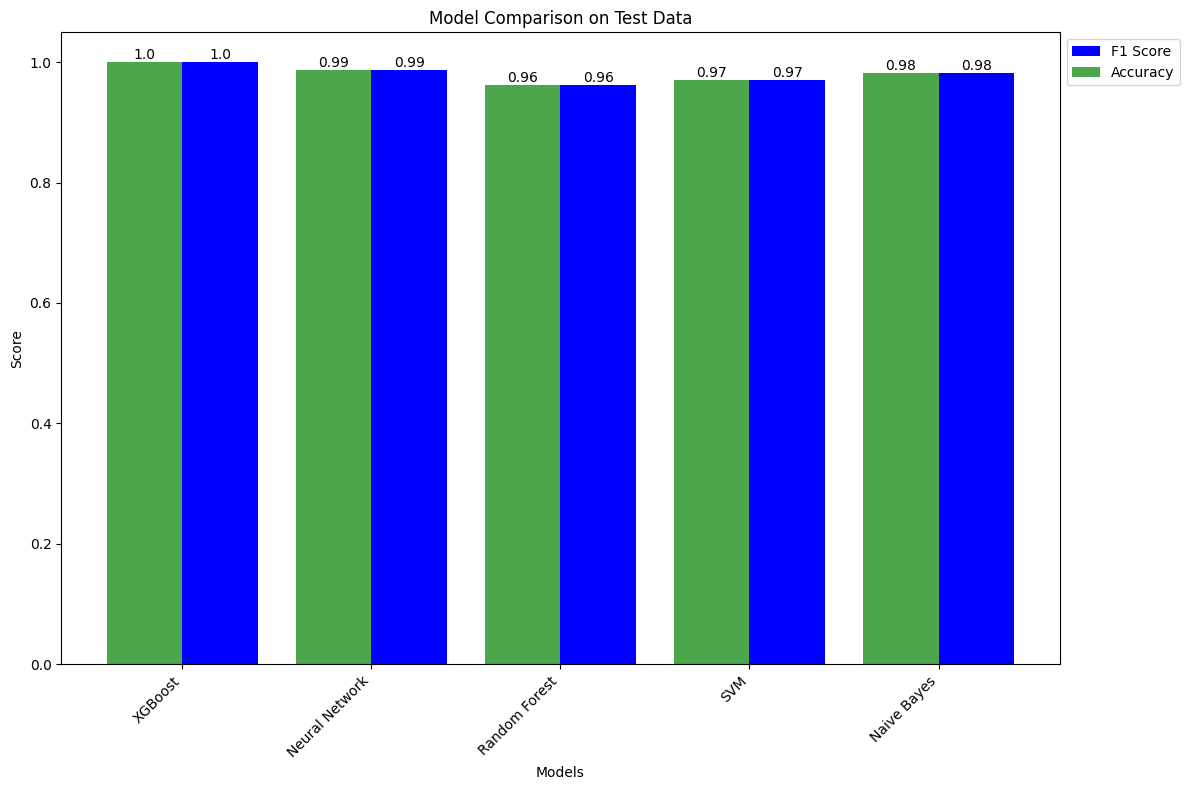

In [46]:
import matplotlib.pyplot as plt

# Assuming results_test, f1_scores_test, accuracies_test are already populated from your test evaluation

# Plotting
plt.figure(figsize=(12, 8))  # Adjust figure size if needed

# Define the width of each bar
bar_width = 0.4

# Positions of the models on the x-axis
positions = range(len(results_test))

# Plot F1 Score bars
bars1 = plt.bar([pos - bar_width/2 for pos in positions], f1_scores_test, width=bar_width, color='Blue', label='F1 Score')

# Plot Accuracy bars
bars2 = plt.bar([pos + bar_width/2 for pos in positions], accuracies_test, width=bar_width, color='Green', alpha=0.7, label='Accuracy')

# Label models on the x-axis with slanted text
plt.xticks(positions, list(results_test.keys()), rotation=45, ha='right')

plt.xlabel('Models')  # X-axis label
plt.ylabel('Score')  # Y-axis label
plt.title('Model Comparison on Test Data')  # Plot title

# Add numbers on top of bars
for bar1, bar2 in zip(bars1, bars2):
    yval1 = bar1.get_height()
    plt.text(bar1.get_x() + bar1.get_width()/2., yval1, round(yval1, 2), ha='center', va='bottom', color='black')

    yval2 = bar2.get_height()
    plt.text(bar2.get_x() + bar2.get_width()/2., yval2, round(yval2, 2), ha='center', va='bottom', color='black')

# Adjust legend position
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # Place legend outside the bars

plt.gca().invert_xaxis()  # Invert x-axis to display models from right to left
plt.tight_layout()  # Ensure labels fit within the figure
plt.show()

RESULTS:

Visual Insights from the Plot

Random Forest, Neural Network and SVM outperforms other models with perfect scores in both accuracy and F1 score (0.99).

Logistic Regression show similar high performance with an accuracy and F1 score of 0.98.

Naive Bayes has slightly lower performance with an accuracy and F1 score of 0.97, but it is still quite high.

## 10. Conclusion <a class="anchor" id="chapter10"></a>

<b> Summary of Key Findings:</b>

<b> Evaluation of the Methodology:</b>

<b> Implications of the Findings:</b>

<b> Suggestions for Future Work:</b>

<b> Reflection on the Data Source and Quality:</b>

<b> Concluding Thoughts:</b>

## 11. References <a class="anchor" id="chapter11"></a>